In [22]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated, get_data_exfiltration_cdf
from statistics import mean
import seaborn as sns

from lifelines import KaplanMeierFitter
import pandas as pd

In [23]:
# Baseline attacker
baseline_standalone_d0_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d0_h0'))
baseline_standalone_d2_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d2_h0'))
baseline_standalone_d4_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d4_h0'))
baseline_standalone_d6_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d6_h0'))
baseline_standalone_d8_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d8_h0'))
baseline_standalone_d10_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d10_h0'))

baseline_standalone_d0_h50 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d0_h50'))

In [24]:
baseline_standalone_d0_h0_times = get_data_exfiltration_times(baseline_standalone_d0_h0, expected_files=45)
baseline_standalone_d2_h0_times = get_data_exfiltration_times(baseline_standalone_d2_h0, expected_files=45)
baseline_standalone_d4_h0_times = get_data_exfiltration_times(baseline_standalone_d4_h0, expected_files=45)
baseline_standalone_d6_h0_times = get_data_exfiltration_times(baseline_standalone_d6_h0, expected_files=45)
baseline_standalone_d8_h0_times = get_data_exfiltration_times(baseline_standalone_d8_h0, expected_files=45)
baseline_standalone_d10_h0_times = get_data_exfiltration_times(baseline_standalone_d10_h0, expected_files=45)

baseline_standalone_d0_h50_times = get_data_exfiltration_times(baseline_standalone_d0_h50, expected_files=45)

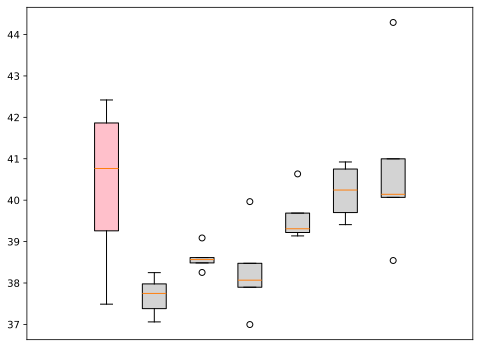

In [25]:
# Box plot comparing data exfiltration times
positions = [.3, .6, .9, 1.2, 1.5, 1.8, 2.1]

data = [baseline_standalone_d0_h50_times['time_exfiltrated'],
        baseline_standalone_d0_h0_times['time_exfiltrated'], 
        baseline_standalone_d2_h0_times['time_exfiltrated'], 
        baseline_standalone_d4_h0_times['time_exfiltrated'], 
        baseline_standalone_d6_h0_times['time_exfiltrated'], 
        baseline_standalone_d8_h0_times['time_exfiltrated'], 
        baseline_standalone_d10_h0_times['time_exfiltrated']
        ]


plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data, positions=positions, patch_artist=True, widths=0.15)

# plt.xticks(positions, ['0', '0', '2', '4', '6', '8', '10'])
# hide xticks
plt.xticks([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['pink', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/costBenefit.svg', transparent=True)

In [6]:
average_baseline = mean(baseline_standalone_d0_h0_times["time_exfiltrated"])

# Percent increase from baseline
def percent_increase(data, baseline):
    data['percent_increase'] = ((data['time_exfiltrated'] - baseline) / baseline) * 100

percent_increase(baseline_standalone_d2_h0_times, average_baseline)
percent_increase(baseline_standalone_d4_h0_times, average_baseline)
percent_increase(baseline_standalone_d6_h0_times, average_baseline)
percent_increase(baseline_standalone_d8_h0_times, average_baseline)
percent_increase(baseline_standalone_d10_h0_times, average_baseline)

percent_increase(baseline_standalone_d0_h50_times, average_baseline)

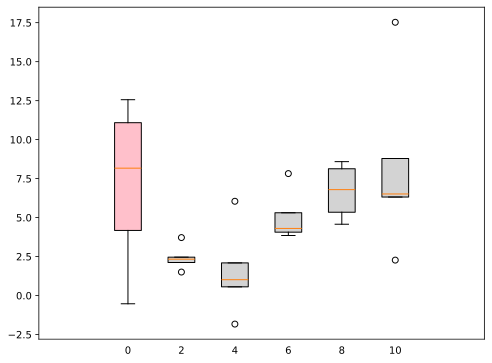

In [7]:
# Box plot comparing data exfiltration times
positions = [.3, .6, .9, 1.2, 1.5, 1.8]

data = [baseline_standalone_d0_h50_times['percent_increase'],
        baseline_standalone_d2_h0_times['percent_increase'], 
        baseline_standalone_d4_h0_times['percent_increase'], 
        baseline_standalone_d6_h0_times['percent_increase'], 
        baseline_standalone_d8_h0_times['percent_increase'], 
        baseline_standalone_d10_h0_times['percent_increase']
        ]


plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data, positions=positions, patch_artist=True, widths=0.15)

plt.xticks(positions, ['0', '2', '4', '6', '8', '10'])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['pink', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/costBenefit.svg', transparent=True)

In [8]:
baseline_standalone_d0_h0_times = get_data_exfiltration_times(baseline_standalone_d0_h0, expected_files=1)
baseline_standalone_d2_h0_times = get_data_exfiltration_times(baseline_standalone_d2_h0, expected_files=1)
baseline_standalone_d4_h0_times = get_data_exfiltration_times(baseline_standalone_d4_h0, expected_files=1)
baseline_standalone_d6_h0_times = get_data_exfiltration_times(baseline_standalone_d6_h0, expected_files=1)
baseline_standalone_d8_h0_times = get_data_exfiltration_times(baseline_standalone_d8_h0, expected_files=1)
baseline_standalone_d10_h0_times = get_data_exfiltration_times(baseline_standalone_d10_h0, expected_files=1)

baseline_standalone_d0_h50_times = get_data_exfiltration_times(baseline_standalone_d0_h50, expected_files=1)

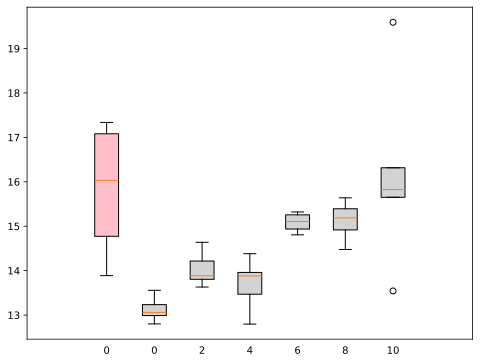

In [9]:
# Box plot comparing data exfiltration times
positions = [.3, .6, .9, 1.2, 1.5, 1.8, 2.1]

data = [baseline_standalone_d0_h50_times['time_exfiltrated'],
        baseline_standalone_d0_h0_times['time_exfiltrated'], 
        baseline_standalone_d2_h0_times['time_exfiltrated'], 
        baseline_standalone_d4_h0_times['time_exfiltrated'], 
        baseline_standalone_d6_h0_times['time_exfiltrated'], 
        baseline_standalone_d8_h0_times['time_exfiltrated'], 
        baseline_standalone_d10_h0_times['time_exfiltrated']
        ]


plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data, positions=positions, patch_artist=True, widths=0.15)

plt.xticks(positions, ['0', '0', '2', '4', '6', '8', '10'])
# hide xticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')

# fill with colors
colors = ['pink', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/costBenefit.svg', transparent=True)

In [10]:
baseline_cdf = get_data_exfiltration_cdf(baseline_standalone_d0_h0 + baseline_standalone_d10_h0 + baseline_standalone_d0_h50, expected_files=48)

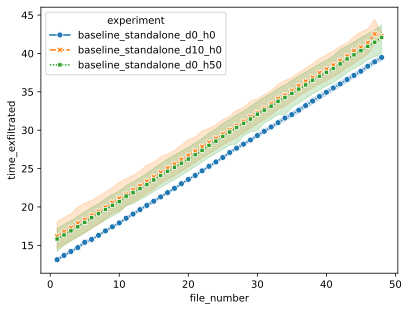

In [20]:
ax = sns.lineplot(data=baseline_cdf, 
             x="file_number", y="time_exfiltrated", hue="experiment",
             style="experiment", markers=True, dashes=True)

# Save as svg
plt = ax.get_figure()
plt.savefig('./plots/exfiltrateLine.svg', transparent=True)